# AAM-IPL Week-3 Logistic Regression - Cross-Sell Vehicle Insurance Prediction Reference Implementation
**Implemented By**: Venkateswar Reddy Melachervu </br>
**Branch of Study**:CS-Core and CS-AI and ML </br>
**Department**: CSM </br>
**Semester**: V 2024-25 AY </br>
**Email**: venkat@brillium.in </br>
**Guest Faculty and Instructor**: Venkateswar Reddy Melachervu, CTO, Brillium Technologies </br>
**Program Coordinator**: Prof. V.Suresh, CSM, GPREC </br>

**Project Implementation Details**: </br>
As published in the project announcement in AAM-IPL Online Classroom


**AAM-IPL of GPREC is brought to you by Brillium Technologies.**

Missing values in training data:
 id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Missing values in test data:
 id                           0
Gender                       0
Age                          0
Driving_License              0
Region_Code                  0
Previously_Insured           0
Vehicle_Age                  0
Vehicle_Damage               0
Annual_Premium               0
Policy_Sales_Channel         0
Vintage                      0
Response                127037
dtype: int64
Best Parameters from Grid Search: {'C': 0.01, 'solver': 'saga'}
Validation Accuracy: 68.4815%


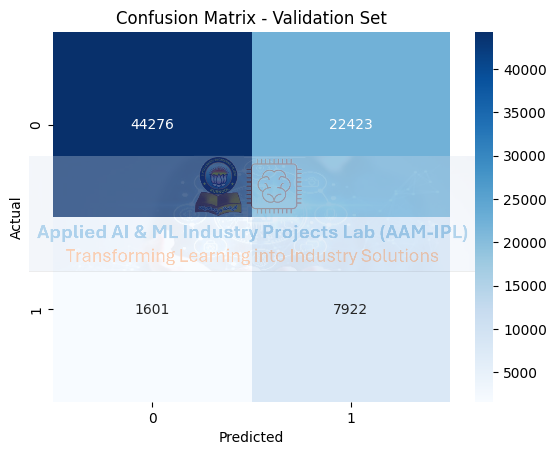

Classification Report (Validation Set):
               precision    recall  f1-score   support

           0       0.97      0.66      0.79     66699
           1       0.26      0.83      0.40      9523

    accuracy                           0.68     76222
   macro avg       0.61      0.75      0.59     76222
weighted avg       0.88      0.68      0.74     76222



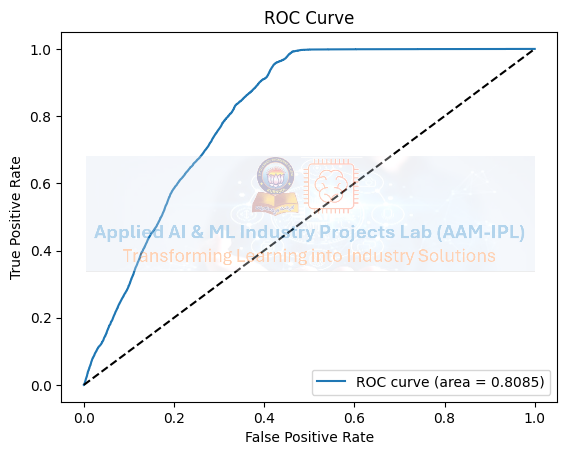

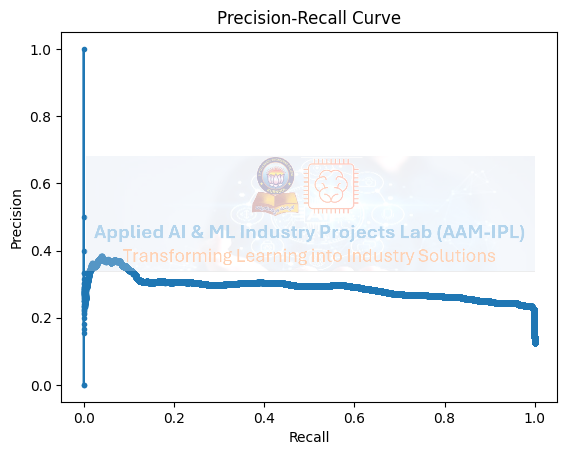

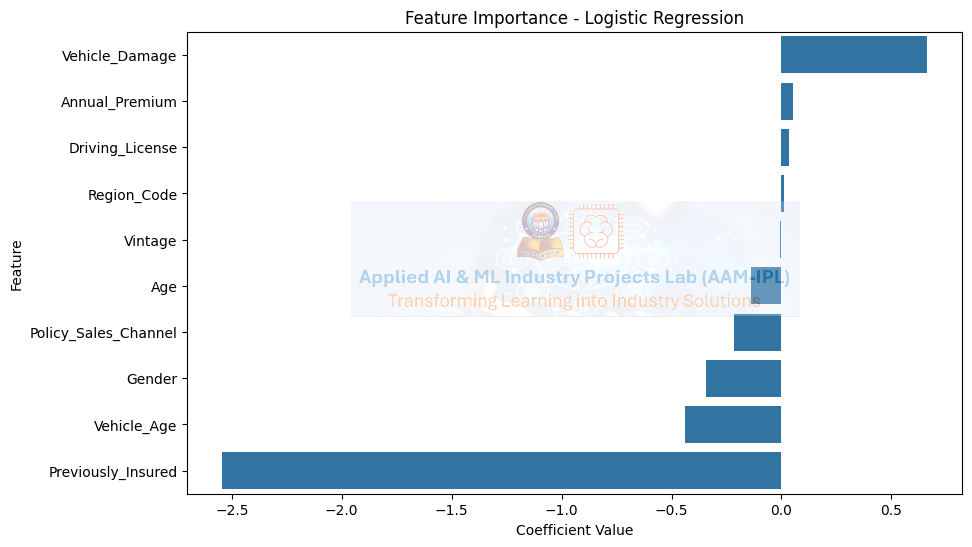

Submission file created: 'insurance_prediction_submission_balanced.csv'


In [2]:
# Cross-Sell Vehicle Insurance Prediction with Watermark

# Importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

# Load the watermark image
watermark = mpimg.imread('AAM-IPL-Header-6.png')

# Function to add watermark
def add_watermark(ax, watermark, alpha=0.3, zoom=0.30):
    imagebox = OffsetImage(watermark, alpha=alpha, zoom=zoom)
    ab = AnnotationBbox(imagebox, (0.5, 0.5), frameon=False, xycoords='axes fraction', boxcoords="axes fraction", pad=0)
    ax.add_artist(ab)

# Load the training and test datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Check for missing values
print("Missing values in training data:\n", train_data.isnull().sum())
print("\nMissing values in test data:\n", test_data.isnull().sum())

# Data Preprocessing
label_encoders = {}
from sklearn.preprocessing import LabelEncoder

# Encoding 'Gender'
label_encoders['Gender'] = LabelEncoder()
train_data['Gender'] = label_encoders['Gender'].fit_transform(train_data['Gender'])
test_data['Gender'] = label_encoders['Gender'].transform(test_data['Gender'])

# Encoding 'Vehicle_Age'
label_encoders['Vehicle_Age'] = LabelEncoder()
train_data['Vehicle_Age'] = label_encoders['Vehicle_Age'].fit_transform(train_data['Vehicle_Age'])
test_data['Vehicle_Age'] = label_encoders['Vehicle_Age'].transform(test_data['Vehicle_Age'])

# Encoding 'Vehicle_Damage'
label_encoders['Vehicle_Damage'] = LabelEncoder()
train_data['Vehicle_Damage'] = label_encoders['Vehicle_Damage'].fit_transform(train_data['Vehicle_Damage'])
test_data['Vehicle_Damage'] = label_encoders['Vehicle_Damage'].transform(test_data['Vehicle_Damage'])

# Separate features (X) and target/response variable (Y) from the training data
X = train_data.drop(columns=['Response', 'id'])
y = train_data['Response']

# Splitting the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Handling class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(test_data.drop(columns=['id', 'Response']))

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

logreg = LogisticRegression(class_weight='balanced', max_iter=10000)
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train_smote)

# Best hyperparameters
print("Best Parameters from Grid Search:", grid_search.best_params_)

# Model Evaluation on Validation Set
best_logreg = grid_search.best_estimator_
y_val_pred = best_logreg.predict(X_val_scaled)

# Accuracy Score on validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy_val * 100:.4f}%")

# Confusion matrix on validation set
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
fig, ax = plt.subplots()
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', ax=ax)
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
add_watermark(ax, watermark)
plt.show()

# Classification report
class_report_val = classification_report(y_val, y_val_pred)
print("Classification Report (Validation Set):\n", class_report_val)

# ROC Curve
y_val_prob = best_logreg.predict_proba(X_val_scaled)[:,1]
fpr, tpr, _ = roc_curve(y_val, y_val_prob)
roc_auc = roc_auc_score(y_val, y_val_prob)

fig, ax = plt.subplots()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
add_watermark(ax, watermark)
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_val, y_val_prob)
fig, ax = plt.subplots()
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
add_watermark(ax, watermark)
plt.show()

# Feature Importance using coefficients from logistic regression
importance = best_logreg.coef_[0]
feature_names = X.columns
feature_importances = pd.Series(importance, index=feature_names).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=feature_importances, y=feature_importances.index, ax=ax)
plt.title('Feature Importance - Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
add_watermark(ax, watermark)
plt.show()

# Predicting on the test dataset
test_predictions_balanced = best_logreg.predict(X_test_scaled)

# Prepare the submission file for test predictions
submission_balanced = pd.DataFrame({
    'id': test_data['id'],
    'Response': test_predictions_balanced
})

# Save the submission file
submission_balanced.to_csv('insurance_prediction_submission_balanced.csv', index=False)
print("Submission file created: 'insurance_prediction_submission_balanced.csv'")

In [5]:
# Generate the PDF of code and output of project jupyter file
!jupyter nbconvert --to pdf AAM-IPL-Wk-4-LogiReg-Cross-Sell-Vehicle-Insurance-Prediction-Full-Code-V3.ipynb



[NbConvertApp] Converting notebook AAM-IPL-Wk-4-LogiReg-Cross-Sell-Vehicle-Insurance-Prediction-Full-Code-V3.ipynb to pdf
[NbConvertApp] Support files will be in AAM-IPL-Wk-4-LogiReg-Cross-Sell-Vehicle-Insurance-Prediction-Full-Code-V3_files\
[NbConvertApp] Making directory .\AAM-IPL-Wk-4-LogiReg-Cross-Sell-Vehicle-Insurance-Prediction-Full-Code-V3_files
[NbConvertApp] Writing 51399 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | b had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 331606 bytes to AAM-IPL-Wk-4-LogiReg-Cross-Sell-Vehicle-Insurance-Prediction-Full-Code-V3.pdf


Missing values in training data:
 id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Missing values in test data:
 id                           0
Gender                       0
Age                          0
Driving_License              0
Region_Code                  0
Previously_Insured           0
Vehicle_Age                  0
Vehicle_Damage               0
Annual_Premium               0
Policy_Sales_Channel         0
Vintage                      0
Response                127037
dtype: int64


C:\Users\vmela\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Validation Accuracy: 87.5062%


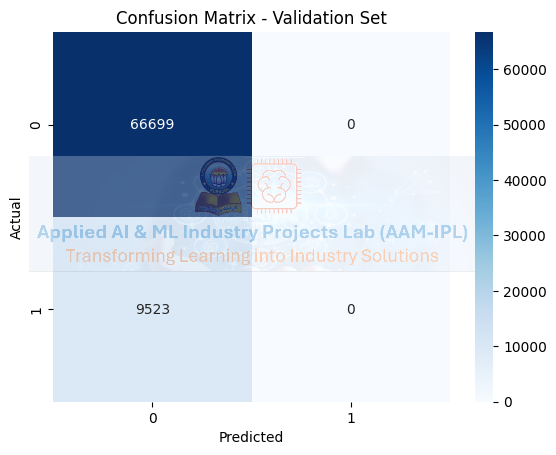

Classification Report (Validation Set):
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.00      0.00      0.00      9523

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222



C:\Users\vmela\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vmela\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vmela\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

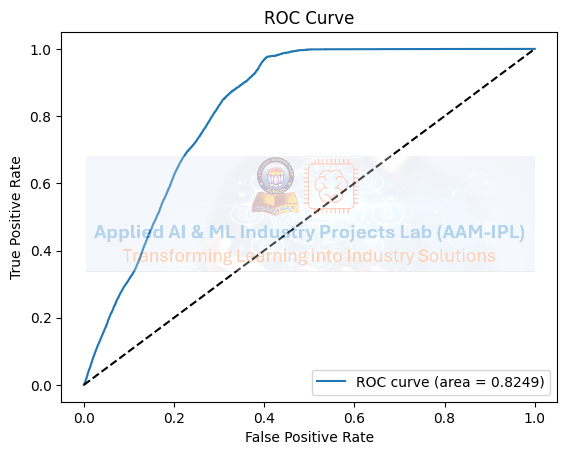

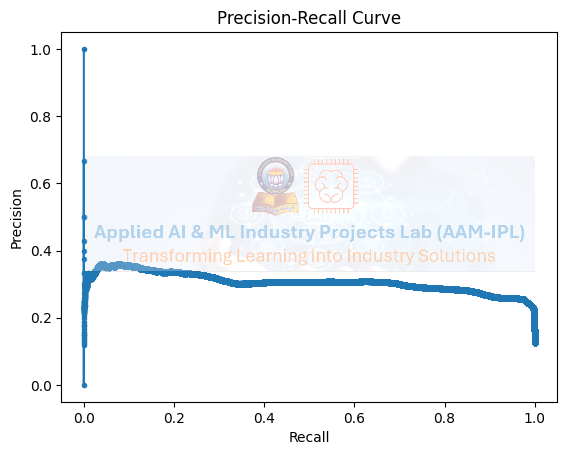

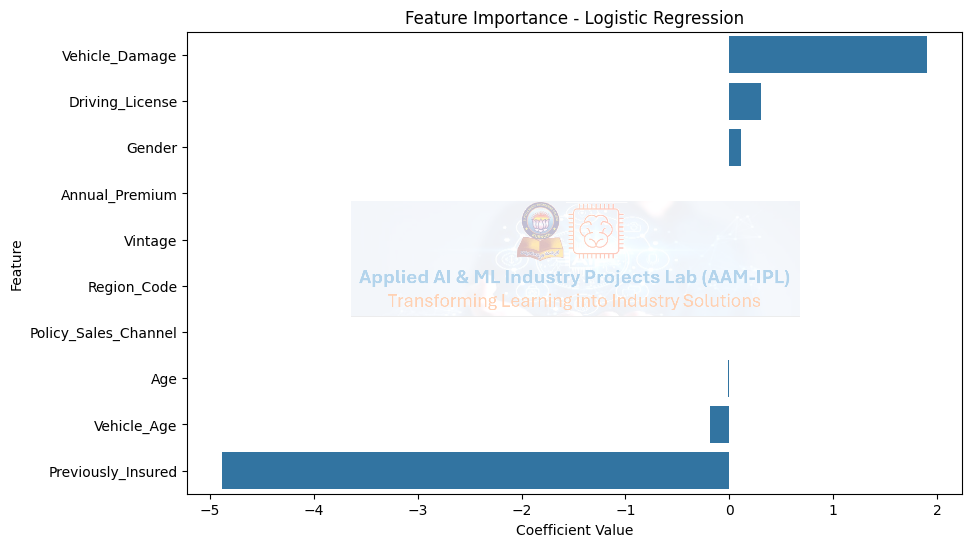

NameError: name 'X_test' is not defined

In [1]:
# Cross-Sell Vehicle Insurance Prediction without SMOTE, Feature Scaling, and GridSearchCV

# Importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

# Load the watermark image
watermark = mpimg.imread('AAM-IPL-Header-6.png')

# Function to add watermark
def add_watermark(ax, watermark, alpha=0.3, zoom=0.30):
    imagebox = OffsetImage(watermark, alpha=alpha, zoom=zoom)
    ab = AnnotationBbox(imagebox, (0.5, 0.5), frameon=False, xycoords='axes fraction', boxcoords="axes fraction", pad=0)
    ax.add_artist(ab)

# Load the training and test datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Check for missing values
print("Missing values in training data:\n", train_data.isnull().sum())
print("\nMissing values in test data:\n", test_data.isnull().sum())

# Data Preprocessing
label_encoders = {}
from sklearn.preprocessing import LabelEncoder

# Encoding 'Gender'
label_encoders['Gender'] = LabelEncoder()
train_data['Gender'] = label_encoders['Gender'].fit_transform(train_data['Gender'])
test_data['Gender'] = label_encoders['Gender'].transform(test_data['Gender'])

# Encoding 'Vehicle_Age'
label_encoders['Vehicle_Age'] = LabelEncoder()
train_data['Vehicle_Age'] = label_encoders['Vehicle_Age'].fit_transform(train_data['Vehicle_Age'])
test_data['Vehicle_Age'] = label_encoders['Vehicle_Age'].transform(test_data['Vehicle_Age'])

# Encoding 'Vehicle_Damage'
label_encoders['Vehicle_Damage'] = LabelEncoder()
train_data['Vehicle_Damage'] = label_encoders['Vehicle_Damage'].fit_transform(train_data['Vehicle_Damage'])
test_data['Vehicle_Damage'] = label_encoders['Vehicle_Damage'].transform(test_data['Vehicle_Damage'])

# Separate features (X) and target/response variable (Y) from the training data
X = train_data.drop(columns=['Response', 'id'])
y = train_data['Response']

# Splitting the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Simple Logistic Regression without SMOTE, Feature Scaling, and GridSearchCV
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

# Model Evaluation on Validation Set
y_val_pred = logreg.predict(X_val)

# Accuracy Score on validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy_val * 100:.4f}%")

# Confusion matrix on validation set
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
fig, ax = plt.subplots()
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', ax=ax)
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
add_watermark(ax, watermark)
plt.show()

# Classification report
class_report_val = classification_report(y_val, y_val_pred)
print("Classification Report (Validation Set):\n", class_report_val)

# ROC Curve
y_val_prob = logreg.predict_proba(X_val)[:,1]
fpr, tpr, _ = roc_curve(y_val, y_val_prob)
roc_auc = roc_auc_score(y_val, y_val_prob)

fig, ax = plt.subplots()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
add_watermark(ax, watermark)
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_val, y_val_prob)
fig, ax = plt.subplots()
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
add_watermark(ax, watermark)
plt.show()

# Feature Importance using coefficients from logistic regression
importance = logreg.coef_[0]
feature_names = X.columns
feature_importances = pd.Series(importance, index=feature_names).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=feature_importances, y=feature_importances.index, ax=ax)
plt.title('Feature Importance - Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
add_watermark(ax, watermark)
plt.show()

# Predicting on the test dataset
test_predictions = logreg.predict(X_test.drop(columns=['id', 'Response']))

# Prepare the submission file for test predictions
submission = pd.DataFrame({
    'id': test_data['id'],
    'Response': test_predictions
})

# Save the submission file
submission.to_csv('insurance_prediction_submission.csv', index=False)
print("Submission file created: 'insurance_prediction_submission.csv'")